## *О работе*

---

**Назване**: Лабораторная работа № 3. Регрессионный анализ данных  
**Автор**: Шашаев Кирилл  
**Проверил**: Новиков И. А.  
**Номер варианта**: 14  
**Номер датасета**: 2  
**Тема датасета**: used-cars-database  
**Цель работы**: получение навыков работы с методами регрессии

### *Задания*

---

1.	Изучить набор данных. Создать описание набора данных на русском языке.
Описать признаки, используемые в наборе данных (включить полученные описания в начало ноутбука).
2.	Проанализируйте колонки в наборе данных и сделайте вывод в какой колонке находится целевое значение, которое должна прогнозировать модель. Анализ отразите в ноутбуке.
3.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
4.	Удалите выбросы из числовых данных. Используйте критерий 1.5-межквантильного интервала. Приведите диаграммы BoxPlot до и после удаления выбросов.
5.	Оцените корреляцию между числовыми признаками, постройте матрицу корреляции. Найдите признаки, которые коррелируют с наибольшим числом других и выпишите их >|0.5| (все кроме целевой колонки).
6.	Проанализируйте колонки на наличие нулевых значений. Выведите количество нулевых по каждой колонке.
7.	Проанализируйте почему в той или иной колонке могут присутствовать нулевые значения.
8.	Выполните удаление столбцов с большим количеством нулевых значений, где это возможно, используйте Imputers для числовых колонок.
9.	Выполните масштабирование количественных (числовых) признаков:  
  a.	Постройте диаграммы BoxPlot для признаков до масштабирования.  
  b.	Выберите способ масштабирования (например, нормализацию или стандартизацию MinMaxScaler, StandardScaler)  
  c.	Выполните масштабирование выбранным методом  
  d.	Постройте диаграммы BoxPlot для признаков после масштабирования.  
10.	Выполните замену категориальных признаков; выберите и обоснуйте способ
замены (one hot encoder, label encoder);  
11.	Решите поставленную задачу регрессии см. пункт 2.  
  a.	Разделите набор данных на две выборки: обучение и тест  
  b.	По каждому методу регрессии из задания изучите возможные для изменения параметры и их значения  
  c.	При подборе параметров модели регрессии используйте перекрёстную проверку (GridSearch CrossValidate). Обоснуйте выбор метрики для параметра refit в GridSearchCV.  
  d.	Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным на тестовой выборке (MAE или MSE).  
  e.	Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным. Проанализируйте значение p-value.  

Кодировка моделей:
1 – линейная регрессия без использования регуляризаторов;
2 – линейная регрессия, LASSO регуляризатор;
3 – линейная регрессия, RIDGE регуляризатор;



# Описание набора данных

## Данные о подержанных автомобилях с eBay-Kleinanzeigen

**Более 370 000 подержанных автомобилей** были собраны с помощью Scrapy с eBay-Kleinanzeigen. Данные представлены на немецком языке, поэтому их необходимо перевести, если вы не владеете немецким.

### Поля в файле `autos.csv`:

| Поле | Описание |
|------|----------|
| **dateCrawled** | Дата первого сбора объявления (все значения полей актуальны на эту дату) |
| **name** | Название автомобиля |
| **seller** | Тип продавца: *частное лицо* или *дилер* |
| **offerType** | Тип предложения |
| **price** | Цена автомобиля в объявлении |
| **abtest** | Поле A/B тестирования |
| **vehicleType** | Тип транспортного средства |
| **yearOfRegistration** | Год первой регистрации автомобиля |
| **gearbox** | Тип коробки передач |
| **powerPS** | Мощность автомобиля в лошадиных силах (PS) |
| **model** | Модель автомобиля |
| **kilometer** | Пробег автомобиля (в километрах) |
| **monthOfRegistration** | Месяц первой регистрации автомобиля |
| **fuelType** | Тип топлива |
| **brand** | Марка автомобиля |
| **notRepairedDamage** | Наличие не устраненных повреждений |
| **dateCreated** | Дата создания объявления на eBay |
| **nrOfPictures** | Количество фотографий в объявлении *(в данном наборе данных всегда 0 из-за ошибки парсера)* |
| **postalCode** | Почтовый индекс |
| **lastSeenOnline** | Дата последнего появления объявления в сети |


## *Импорт нужных бибилеотек*

---


In [813]:
import datetime
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.tree
import sklearn.multiclass
from sklearn.metrics import precision_recall_curve, average_precision_score
from scipy.stats import pearsonr, spearmanr

## *Подключение к файлу*

---

Устанавливаем датасет

In [737]:
file_id = '1S1DRyS3SLyThHCM0NKxBHA5wuIhEFGos'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'autos.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1S1DRyS3SLyThHCM0NKxBHA5wuIhEFGos
To: /content/autos.csv
100%|██████████| 68.4M/68.4M [00:00<00:00, 72.7MB/s]


'autos.csv'

Проверяем что нужный файл скачался

In [738]:
!ls

autos.csv  sample_data


Открываем *датасет*

In [739]:
df = pd.read_csv(output, encoding='cp1252')

## *Анализ датасета*

---

In [740]:
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [741]:
df.tail(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371518,2016-04-02 20:37:03,Bmw_320_D_DPF_Touring_!!!,privat,Angebot,3999,test,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein,2016-04-02 00:00:00,0,81825,2016-04-06 20:47:12
371519,2016-03-09 13:37:43,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,privat,Angebot,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


Видим что в датасете присутствуют как *числовые*, так и *категориальные* признаки. Как и сказано в описании все видимые значения признака `nrOfPictures` являюстя нулями. Также в датасете присутствуют столбцы представляющие время.

Информация о *числовых колонках*

In [742]:
df.describe(include='int')

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Видим что у какого-то автомобиля год **регистрации равено 9999**, это говорит, что в этой компании регистрируются *гости из будущего*. Также какой-то автомобиль был **зарегистрирован в 1000-ом до своего изобретения**. Все значение колонки `nrOfPictures`, как и описано равные 0-лю. Минимальная цена машины - **ноль**, максимальная - *несколько миллиандов*. *Максимальное кол-во лошадиных сил* - **20000**, что являестя *невозможным значением*. Остальные значения выглядят нормальными. В итоге можно сказать, что в данных присутствуют большие выбросы, колонку `nrOfPictures` можно удалить.

Информация о *строковых данных*

In [743]:
df.describe(include='object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


Видим, что от *дилера* есть **только 4-ре заявки**, а от *частных* лиц - **371521**, поэтому колонка `seller` не несёт какой-либо ценной информации (можно удилить). Таже ситуация с колонкой `offerType`. Колонка `name` имеет **> 200000** уникальных значений. Хоть и мода **> 600**, но это означает, что большинство имён встречаются только тесколько раз, что не даёт нам большой информации. Поэтому это столбец можно удалить.

**Размерность** датасета

In [744]:
df.shape

(371528, 20)

Смотрим информация по *структуре датасета* и *пропущенных значениях*

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

Посчитаем кол-во пропущенных значений (Null) по столбцам.

In [746]:
df.isnull().sum().sort_values(ascending=False, inplace=False)

,0
notRepairedDamage,72060
vehicleType,37869
fuelType,33386
model,20484
gearbox,20209
seller,0
name,0
dateCrawled,0
offerType,0
abtest,0


Посчитаем процент пропущенных значений (Null) по столбцам.

In [747]:
df.isnull().mean().sort_values(ascending=False, inplace=False).round(4) * 100

,0
notRepairedDamage,19.40
vehicleType,10.19
fuelType,8.99
model,5.51
gearbox,5.44
seller,0.00
name,0.00
dateCrawled,0.00
offerType,0.00
abtest,0.00


In [748]:
max_count_null = df.isnull().sum(axis=0).max()
print(f'Максимальное кол-во пропусков - {max_count_null}')

Максимальное кол-во пропусков - 72060


Видем, что есть необходимость обработки пропущенных значений

По заданиею делаем вывод, что основная цель датасета - предсказание стоимости авто `price` по другим хар-ам.

## Обработка датасета

---



### Уменьшение размерности датасета

---



Удаляем лишние или избыточные признаки, не несущие информации.

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [750]:
df = df.drop('nrOfPictures', axis=1)
df = df.drop('seller', axis=1)
df = df.drop('offerType', axis=1)
df = df.drop('name', axis=1)

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   price                371528 non-null  int64 
 2   abtest               371528 non-null  object
 3   vehicleType          333659 non-null  object
 4   yearOfRegistration   371528 non-null  int64 
 5   gearbox              351319 non-null  object
 6   powerPS              371528 non-null  int64 
 7   model                351044 non-null  object
 8   kilometer            371528 non-null  int64 
 9   monthOfRegistration  371528 non-null  int64 
 10  fuelType             338142 non-null  object
 11  brand                371528 non-null  object
 12  notRepairedDamage    299468 non-null  object
 13  dateCreated          371528 non-null  object
 14  postalCode           371528 non-null  int64 
 15  lastSeen             371528 non-nu

### Обработка дубликатов

---



Найдём кол-во дубликатов

In [752]:
count_duplicated = int(df.duplicated().sum())
count_duplicated

4

In [753]:
df = df.drop_duplicates()

In [754]:
count_duplicated = int(df.duplicated().sum())
count_duplicated

0

**Дубликаты** в датасете обнаружены и удалены

### Обработка временных признаков

---



In [755]:
df.head()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


К временным признакам можно отнести:`dateCrawled`, `dateCreated`, `lastSeen`.

In [756]:
datetime_columns = ['dateCrawled', 'dateCreated', 'lastSeen']
for column in datetime_columns:
  df[column] = pd.to_datetime(df[column]).astype('int64') // 10**9

In [757]:
df.head(3)

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,1458820337,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,1458777600,70435,1459999017
1,1458817125,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,1458777600,66954,1459993610
2,1457959941,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,1457913600,90480,1459860466


In [758]:
df.describe(include='number')

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,postalCode,lastSeen
count,3.715240e+05,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,3.715240e+05,371524.00000,3.715240e+05
mean,1.458567e+09,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,1.458503e+09,50820.49427,1.459309e+09
std,7.866201e+05,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,8.121903e+05,25799.08841,7.896350e+05
min,1.457187e+09,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1.394410e+09,1067.00000,1.457187e+09
25%,1.457874e+09,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,1.457827e+09,30459.00000,1.458733e+09
50%,1.458585e+09,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,1.458518e+09,49610.00000,1.459725e+09
75%,1.459263e+09,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,1.459210e+09,71546.00000,1.459940e+09
max,1.460040e+09,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,1.459987e+09,99998.00000,1.460041e+09


Данные коректно преоброзовались. Так как `.astype('int64')` дает кол-во наносекунд делим на 10 ** 9.

### Обработка пропусков в категориальных признаках

---



In [759]:
df.isnull().sum().sort_values(ascending=False)[:7]

,0
notRepairedDamage,72060
vehicleType,37869
fuelType,33386
model,20484
gearbox,20209
price,0
abtest,0


In [760]:
df.describe(include='object')

,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,371524,333655,351315,351040,338138,371524,299464
unique,2,8,2,251,7,40,2
top,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,192583,95894,274212,30070,223854,79639,263179


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371524 non-null  int64 
 1   price                371524 non-null  int64 
 2   abtest               371524 non-null  object
 3   vehicleType          333655 non-null  object
 4   yearOfRegistration   371524 non-null  int64 
 5   gearbox              351315 non-null  object
 6   powerPS              371524 non-null  int64 
 7   model                351040 non-null  object
 8   kilometer            371524 non-null  int64 
 9   monthOfRegistration  371524 non-null  int64 
 10  fuelType             338138 non-null  object
 11  brand                371524 non-null  object
 12  notRepairedDamage    299464 non-null  object
 13  dateCreated          371524 non-null  int64 
 14  postalCode           371524 non-null  int64 
 15  lastSeen             371524 non-null  i

Как видим *пропуски* присутствуют только в **категориальных признаках**. Так как пропусков довольно большое кол-во, то для *сохранения информации* заменим пропуски *пустым значением*.

In [762]:
df[df.isnull()] = ''

In [763]:
df.isnull().sum().sort_values(ascending=False)[:7]

,0
dateCrawled,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
gearbox,0
powerPS,0


In [764]:
df.describe(include='object')

,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,371524,371524,371524,371524,371524,371524,371524
unique,2,9,3,252,8,40,3
top,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,192583,95894,274212,30070,223854,79639,263179


Пропуски ушли, кол-во *уникальных значений* в столбцах ожидаемо повысилось.

### Обработка анамалий во временных данных

---



Первый автомобиль был выпущен в **1886**. Найдём сколько значений на ходятся вне отрезка времени [1886, 2025]

In [765]:
left = 1885
right = datetime.datetime.now().year

In [766]:
print((df['yearOfRegistration'] < left).sum())
print((df['yearOfRegistration'] > right).sum())

68
114


Видим, что строк, котоыре не поподают в диапозон не очень много, поэтому просто их убираем из данных.

In [767]:
df = df.query(f'yearOfRegistration >= {left}')
df = df.query(f'yearOfRegistration <= {right}')

In [768]:
print((df['yearOfRegistration'] < left).sum())
print((df['yearOfRegistration'] > right).sum())

0
0


### Обработка выбросов в числовых данных

---



In [769]:
number_columns = df.select_dtypes(include='number').drop('price', axis=1).columns
number_columns

Index(['dateCrawled', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

Выбросы будем удалаять по критерию 1.5-межквантильного интервала.

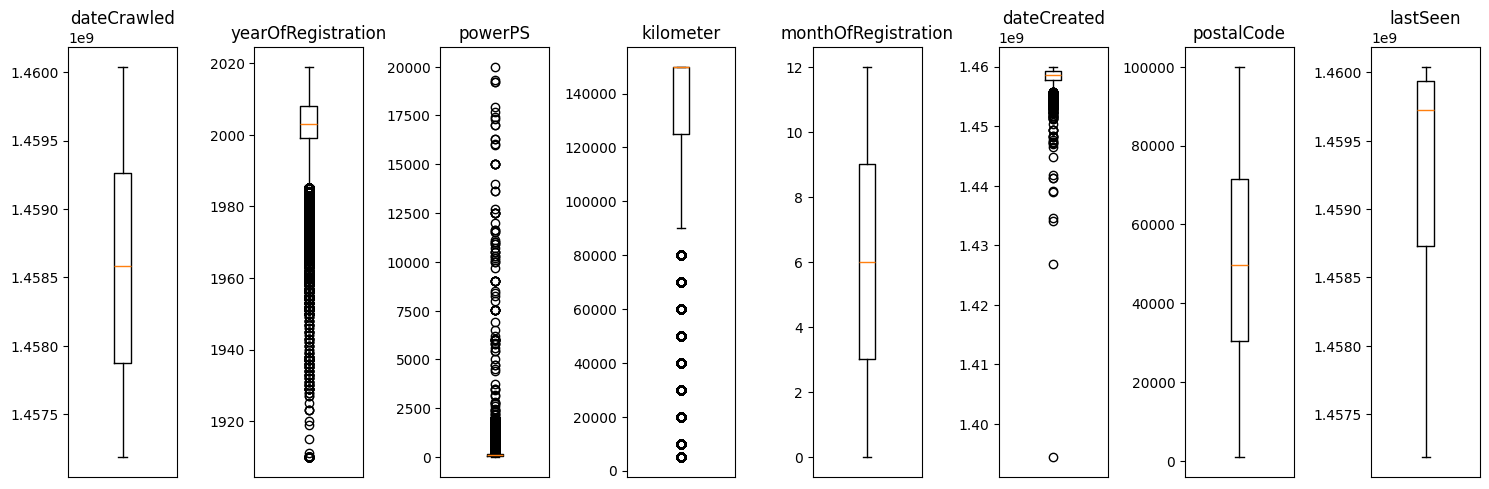

In [770]:
fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 5))

for i, col in enumerate(number_columns):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(col)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

In [771]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = df[col].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)

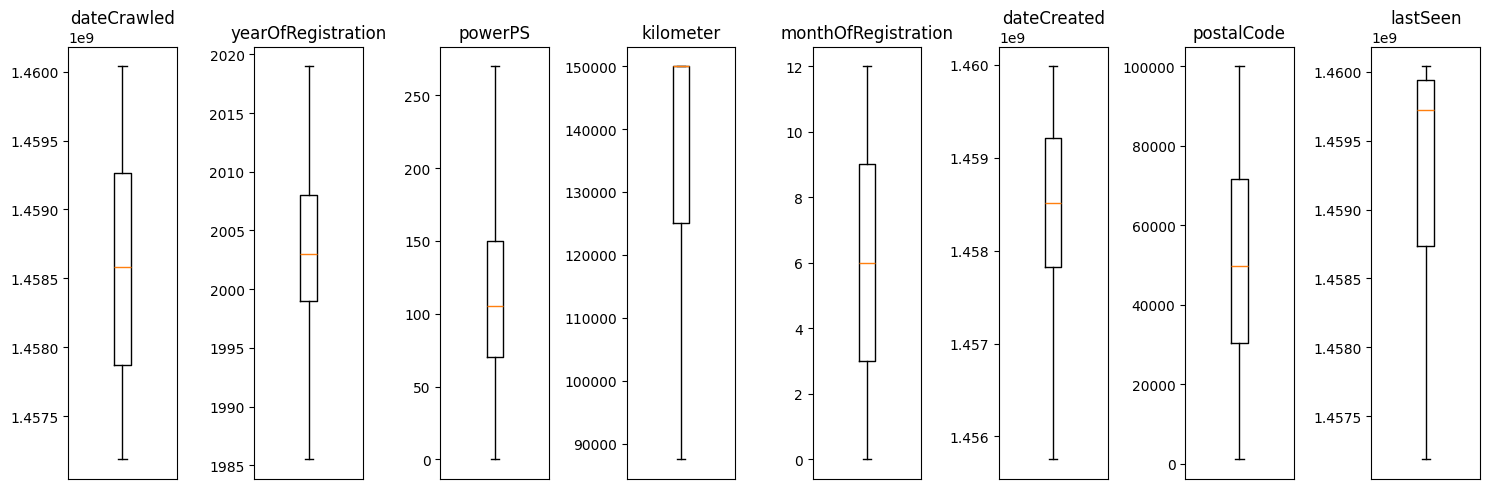

In [772]:
fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 5))

for i, col in enumerate(number_columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

Так как *кол-во выбросов* было довольшое большим - суммарно **отдна треть** строк, вместо удаления делаем приведение значений вне *интерквартильного интервала* к его границам.

### Нормализация значений числовых признаков

---


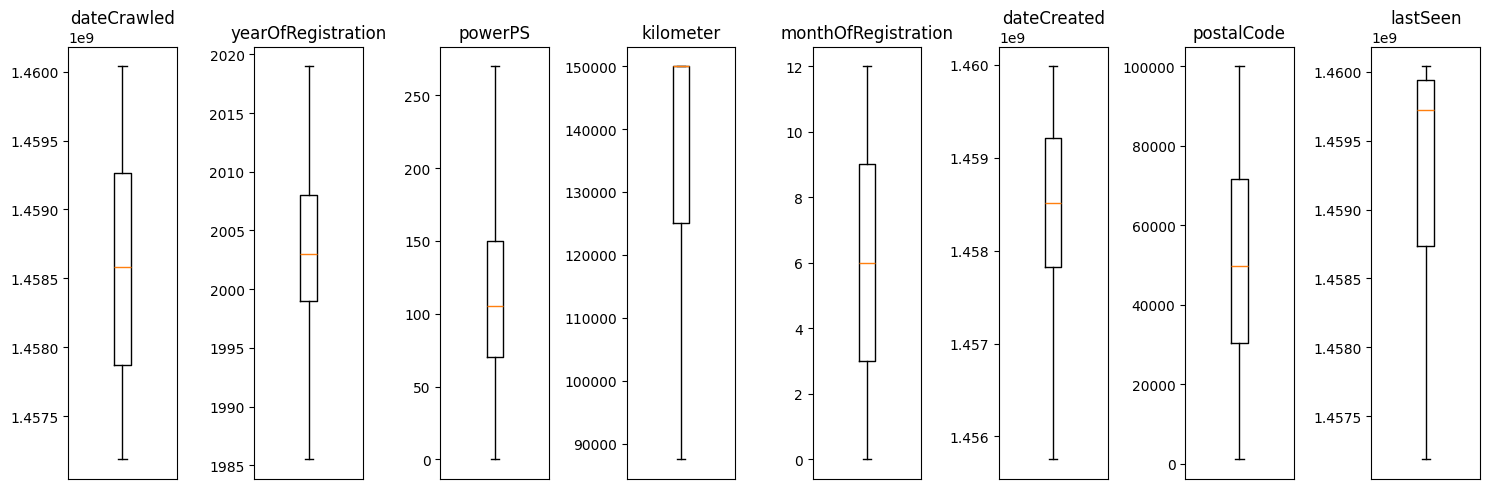

In [773]:
fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 5))

for i, col in enumerate(number_columns):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(col)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

In [774]:
scaler = sklearn.preprocessing.MinMaxScaler()
df[number_columns] = scaler.fit_transform(df[number_columns])

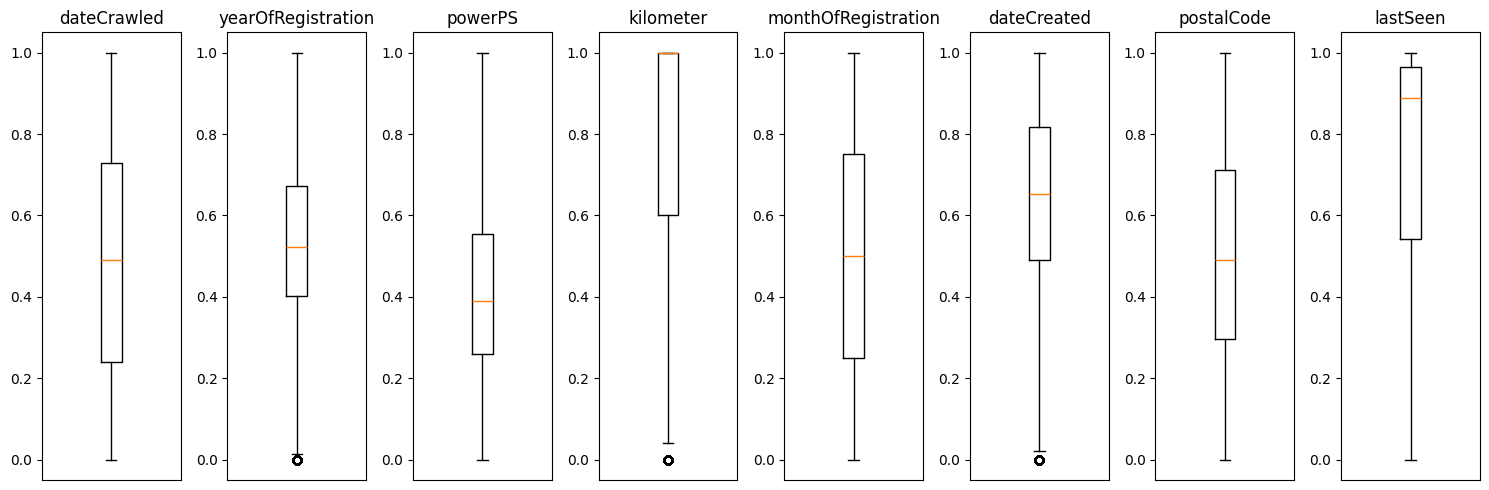

In [775]:
fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 5))

for i, col in enumerate(number_columns):
    axes[i].boxplot(df[col].dropna(), vert=True)
    axes[i].set_title(col)
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

### Преобразование категориальных признаков в числовые

---



Для того, что бы не раздувать датасте и выполнить нажу задачу, разделим категориальные признаки на две группы. *Первая* будет обрабатываться с помощью **one_hot** энкодера, а *вторая* с помощью **label** энкодера. Разделение будет вестись с учётом кол-ва уникальных элементов в колонке: **>= 5**, то label энкодер, иначе **one_hot** энкодер.

In [776]:
df.describe(include='object')

,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,371342,371342,371342,371342,371342,371342,371342
unique,2,9,3,252,8,40,3
top,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,192489,95894,274183,30056,223818,79603,263162


In [777]:
one_hot_columns = ['abtest', 'gearbox', 'notRepairedDamage']
label_columns = ['vehicleType', 'model', 'fuelType', 'brand']

In [778]:
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)
for col in label_columns:
    df[col] = df[col].astype('category').cat.codes

In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371342 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dateCrawled             371342 non-null  float64
 1   price                   371342 non-null  int64  
 2   vehicleType             371342 non-null  int8   
 3   yearOfRegistration      371342 non-null  float64
 4   powerPS                 371342 non-null  float64
 5   model                   371342 non-null  int16  
 6   kilometer               371342 non-null  float64
 7   monthOfRegistration     371342 non-null  float64
 8   fuelType                371342 non-null  int8   
 9   brand                   371342 non-null  int8   
 10  dateCreated             371342 non-null  float64
 11  postalCode              371342 non-null  float64
 12  lastSeen                371342 non-null  float64
 13  abtest_test             371342 non-null  bool   
 14  gearbox_automatik       3

Категориальных признаков не осталось, вес датасета снизился.

### Обработка корреляций

---



Посмотрим на *корреляцию* между признаками. Будем считать корреляцию значительной, если её значение по модулю >= **0.8**.

In [780]:
corr = round(df.drop('price', axis=1).corr(), 2)
corr[abs(corr) <= 0.5] = 0
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        val = corr.iloc[i, j]
        if val != 0:
            col1, col2 = corr.columns[i], corr.columns[j]
            print(f'Корреляция {col1} - {col2} = {val}')

Корреляция dateCrawled - dateCreated = 1.0
Корреляция dateCrawled - lastSeen = 0.58
Корреляция dateCreated - lastSeen = 0.58
Корреляция gearbox_automatik - gearbox_manuell = -0.86
Корреляция notRepairedDamage_ja - notRepairedDamage_nein = -0.51


Колонки `dateCrawled` и `gearbox_automatik ` можно удаилть, из-за того, что корреляция между ними и другими признаками довольно большая.

In [781]:
df = df.drop('dateCrawled', axis=1)
df = df.drop('gearbox_automatik', axis=1)

In [782]:
len(df.columns)

16

## Обучение модели

---



Разделим данные на две выборки

In [730]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df.drop('price', axis=1),
    df['price'],
    test_size=0.3,
    random_state=42,
)

Определим параметры для GridSearchCV и модели для классификации.

In [795]:
param_grid_lasso = {
    'alpha': [0.001, 0.05, 5, 100],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False],
}

In [733]:
lasso_model =  sklearn.linear_model.Lasso()

In [806]:
param_grid_ridge = {
    'alpha': [0.001, 0.05, 5, 100],
    'fit_intercept': [True, False],
    'tol': [1e-4, 1e-3],
    'positive': [True, False]
}

In [800]:
ridge_model = sklearn.linear_model.Ridge()

Определим лучшие парамтеры для каждой модели.

In [808]:
scoring_metric = 'neg_mean_squared_error'
refit_metric = 'MAE'

In [794]:
lasso_gs = sklearn.model_selection.GridSearchCV(
    lasso_model,
    param_grid_lasso,
    scoring=scoring_metric,
    cv=5,
    verbose=2,
    n_jobs=-1,
    refit=refit_metric,
)
lasso_gs.fit(x_train, y_train)

print('Лучшие параметры:', lasso_gs.best_params_)
print(f'Лучший {refit_metric}:', lasso_gs.best_score_)

scoring = {
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

best_model = lasso_gs.best_estimator_
cv = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = sklearn.model_selection.cross_validate(
    best_model,
    x_test,
    y_test,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

print('\nРезультаты кросс-валидации лучшей модели:')
print(f"Средний Train R2: {np.mean(cv_results['train_r2']):.4f}")
print(f"Средний Test R2: {np.mean(cv_results['test_r2']):.4f}")
print(f"Средний Test MSE: {-np.mean(cv_results['test_mse']):.4f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Лучшие параметры: {'alpha': 100, 'fit_intercept': False, 'max_iter': 5000, 'selection': 'random', 'tol': 0.001, 'warm_start': False}
Лучший R2: -17973680547273.562

Результаты кросс-валидации лучшей модели:
Средний Train R2: 0.0002
Средний Test R2: -0.0003
Средний Test MSE: 1002872694811.6328


In [809]:
ridge_gs = sklearn.model_selection.GridSearchCV(
    ridge_model,
    param_grid_ridge,
    scoring=scoring_metric,
    verbose=0,
    n_jobs=-1,
    refit=refit_metric,
)
ridge_gs.fit(x_train, y_train)

print('Лучшие параметры:', ridge_gs.best_params_)
print(f'Лучший {refit_metric}:', ridge_gs.best_score_)

scoring = {
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

best_model = ridge_gs.best_estimator_
cv = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = sklearn.model_selection.cross_validate(
    best_model,
    x_test,
    y_test,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

print('\nРезультаты кросс-валидации лучшей модели:')
print(f"Средний Train R2: {np.mean(cv_results['train_r2']):.4f}")
print(f"Средний Test R2: {np.mean(cv_results['test_r2']):.4f}")
print(f"Средний Test MSE: {-np.mean(cv_results['test_mse']):.4f}")

Лучшие параметры: {'alpha': 0.001, 'fit_intercept': True, 'positive': True, 'tol': 0.0001}
Лучший MAE: -17970132686263.1

Результаты кросс-валидации лучшей модели:
Средний Train R2: 0.0000
Средний Test R2: -0.0001
Средний Test MSE: 1002731555924.7748



Анализ корреляций для Lasso:
Корреляция Пирсона: 0.0075, p-value: 0.01227
Корреляция Спирмена: 0.0342, p-value: 3.204e-30

Анализ корреляций для Ridge:
Корреляция Пирсона: 0.0011, p-value: 0.7232
Корреляция Спирмена: -0.1190, p-value: 0


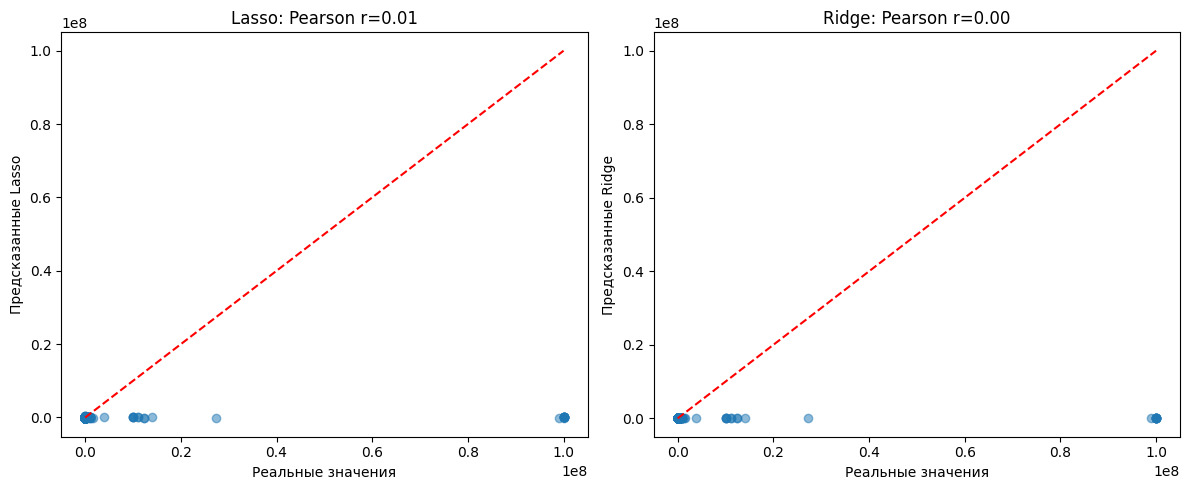

In [814]:
def calculate_correlations(y_true, y_pred):
    pearson_corr, pearson_p = pearsonr(y_true, y_pred)
    spearman_corr, spearman_p = spearmanr(y_true, y_pred)

    print(f"Корреляция Пирсона: {pearson_corr:.4f}, p-value: {pearson_p:.4g}")
    print(f"Корреляция Спирмена: {spearman_corr:.4f}, p-value: {spearman_p:.4g}")
    return {
        'pearson_corr': pearson_corr,
        'pearson_p': pearson_p,
        'spearman_corr': spearman_corr,
        'spearman_p': spearman_p
    }

print("\nАнализ корреляций для Lasso:")
y_pred_lasso = lasso_gs.best_estimator_.predict(x_test)
lasso_corrs = calculate_correlations(y_test, y_pred_lasso)

print("\nАнализ корреляций для Ridge:")
y_pred_ridge = ridge_gs.best_estimator_.predict(x_test)
ridge_corrs = calculate_correlations(y_test, y_pred_ridge)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные Lasso")
plt.title(f"Lasso: Pearson r={lasso_corrs['pearson_corr']:.2f}")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные Ridge")
plt.title(f"Ridge: Pearson r={ridge_corrs['pearson_corr']:.2f}")

plt.tight_layout()
plt.show()

Как видно значения у обученных моделей очень сильно завышенны по сравнению с реальными.